In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
def autoregressive_model(burnin, n, c, phi):
    p = len(phi)
    epsilon = np.random.normal(size=n + burnin)
    ar_values = np.zeros(n + burnin)

    for t in range(p, n + burnin):
        ar_values[t] = c + sum([phi[i] * ar_values[t - i - 1] for i in range(p)]) + epsilon[t]

    return ar_values[burnin:]
    

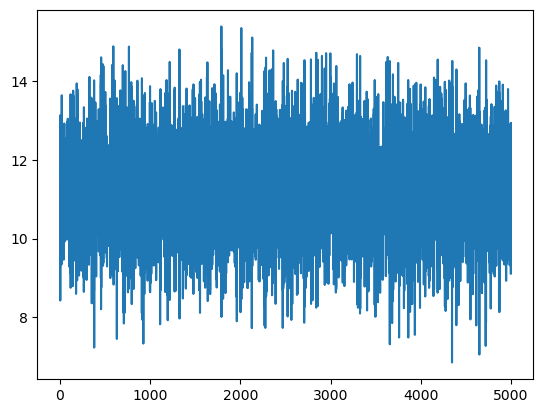

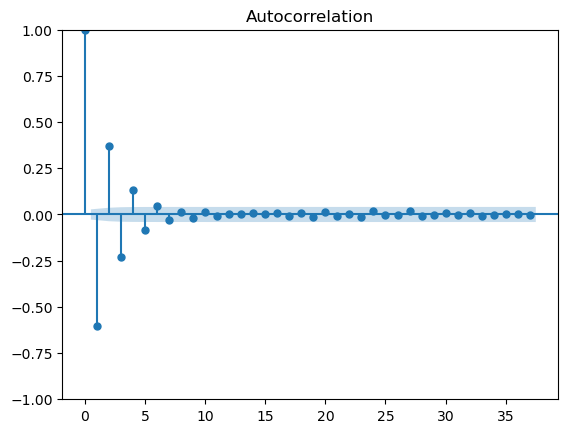

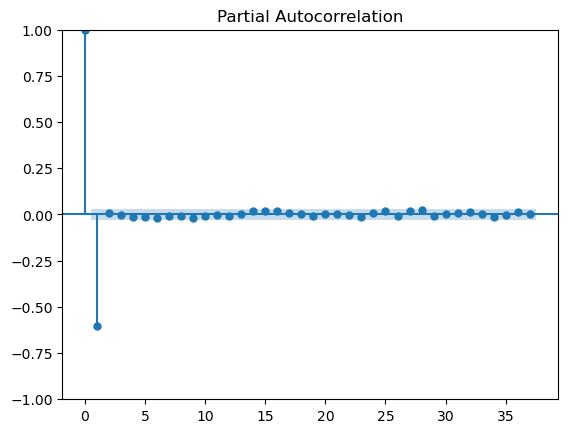

In [3]:
ar_model = autoregressive_model(100, 5000, 18, [-0.6])
plt.plot(ar_model)
plot_acf(ar_model)
plt.show()
plot_pacf(ar_model)
plt.show()  

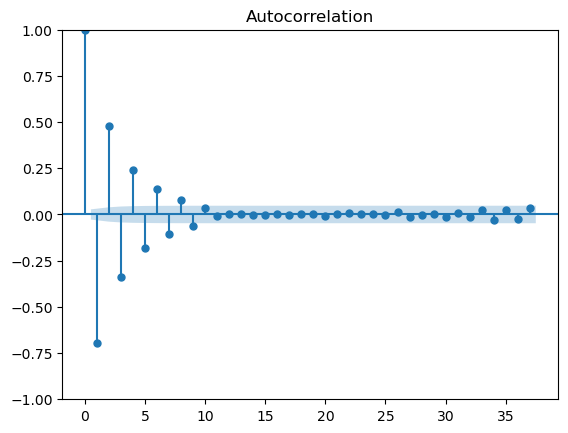

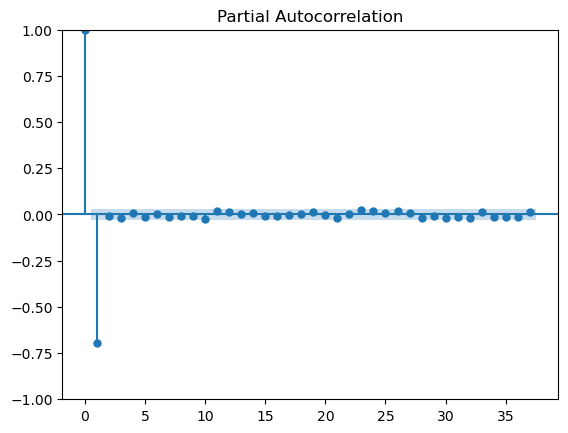

In [4]:
ar_values_2 = autoregressive_model(100, 5000, 18, [-0.7])
plot_acf(ar_values_2)
plt.show()
plot_pacf(ar_values_2)
plt.show()

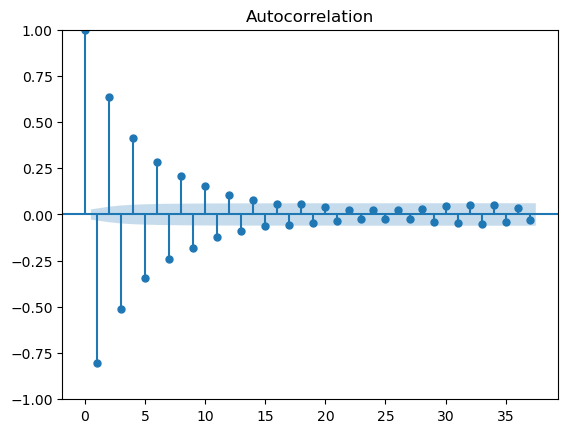

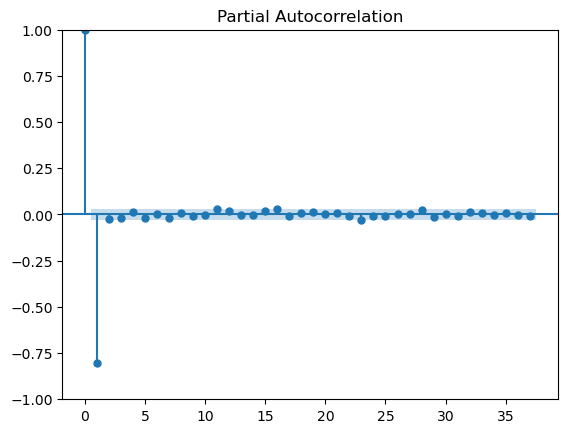

In [5]:
ar_values_3 = autoregressive_model(100, 5000, 18, [-0.8])
plot_acf(ar_values_3)
plt.show()
plot_pacf(ar_values_3)
plt.show()

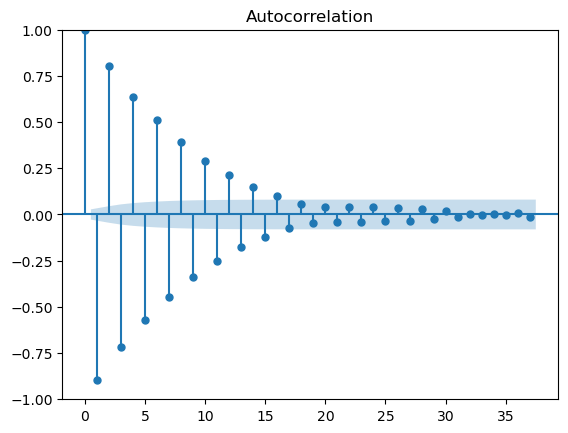

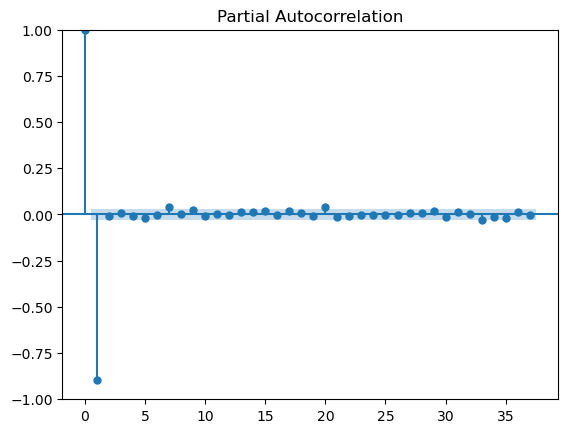

In [6]:
ar_values_4 = autoregressive_model(100, 5000, 18, [-0.9])
plot_acf(ar_values_4)
plt.show()
plot_pacf(ar_values_4)
plt.show()

C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


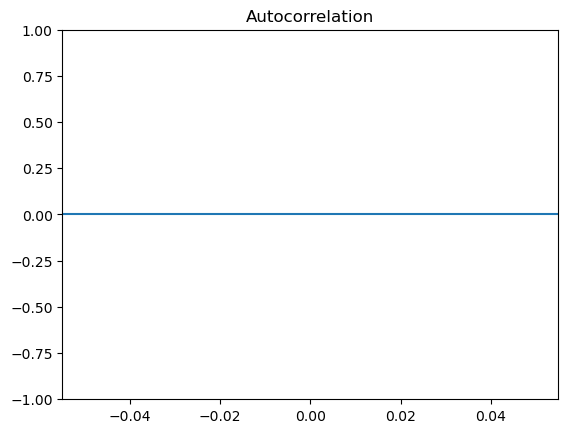

C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1480: RuntimeWarning: overflow encountered in square
  r[0] = (x ** 2).sum() / n
C:\Users\mwdzi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1482: RuntimeWarning: overflow encountered in multiply
  r[k] = (x[0:-k] * x[k:]).sum() / (n - k * adj_needed)
C:\Users\mwdzi\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


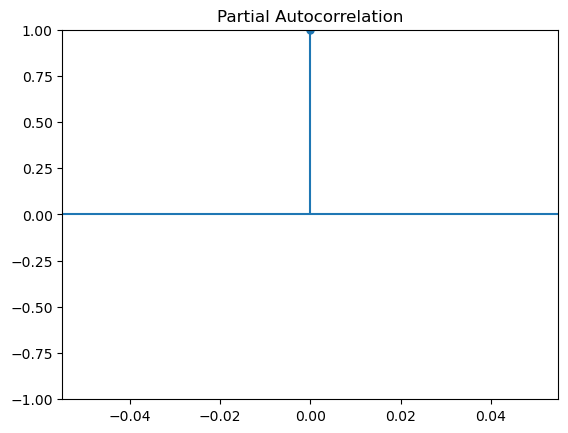

In [7]:
phi_greater_than_one = autoregressive_model(100, 5000, 18, [-1.1])
plot_acf(phi_greater_than_one)
plt.show()
plot_pacf(phi_greater_than_one)
plt.show()

Model becomes unstable and results in calculations overflow. 

In [8]:
values = [ar_model, ar_values_2, ar_values_3, ar_values_4]

def check_stationarity(time_series):
    result = adfuller(time_series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] < 0.05:
        print('The series is stationary')
    else:
        print('The series is not stationary')
    


for value in values:
    check_stationarity(value)
    print("\n")

ADF Statistic: -142.628558
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series is stationary


ADF Statistic: -166.733228
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series is stationary


ADF Statistic: -68.738391
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series is stationary


ADF Statistic: -305.261824
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series is stationary




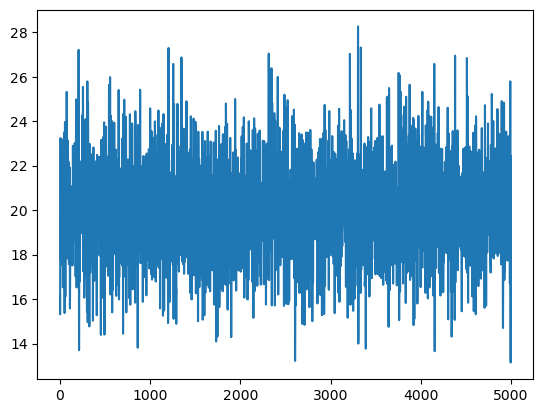

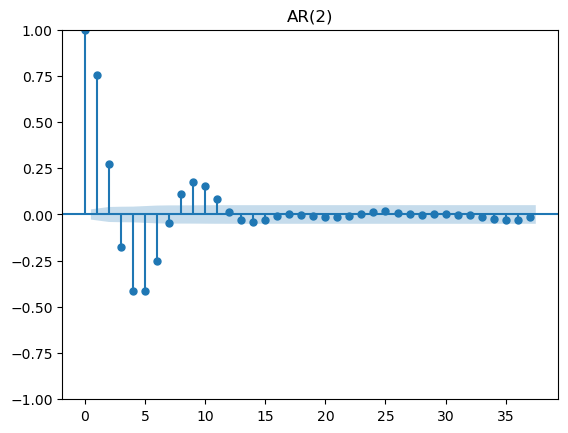

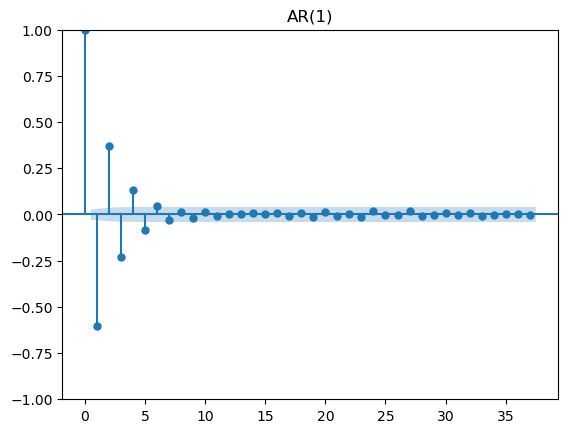

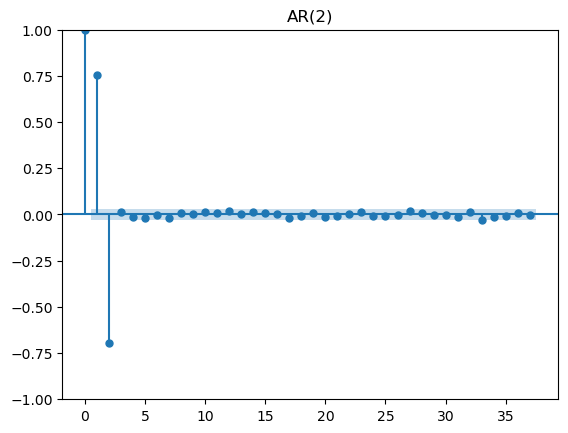

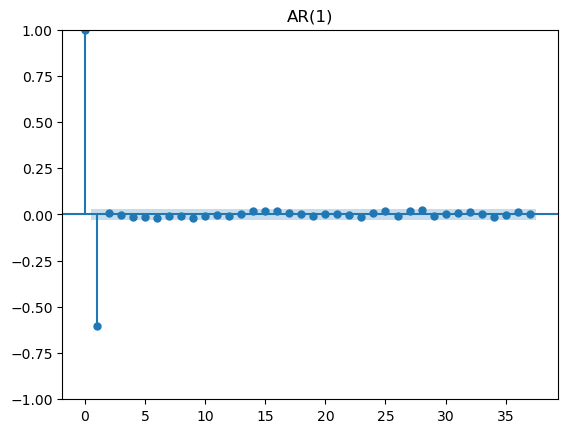

In [9]:
ar2_model = autoregressive_model(100, 5000, 8, [1.3, -0.7])
plt.plot(ar2_model)
plot_acf(ar2_model, title='AR(2)')
plot_acf(ar_model, title='AR(1)')
plt.show()
plot_pacf(ar2_model, title='AR(2)')
plot_pacf(ar_model, title='AR(1)')
plt.show()

The value of autocorrelation drops faster in the first model, in the second model the autocorrelation function oscillates before dropping to zero. The partial autocorrelation function also cuts off faster in the first model.

In [10]:
check_stationarity(ar2_model)

ADF Statistic: -58.498798
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series is stationary


In [11]:
def moving_average(burnin, n, c, theta):
    q = len(theta)
    epsilon = np.random.normal(size=n + burnin)
    ma_values = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_values[t] = c + epsilon[t] + sum([theta[i] * epsilon[t - i - 1] for i in range(q)])

    return ma_values[burnin:]

ma_values = moving_average(100, 5000, 20, [0.8])

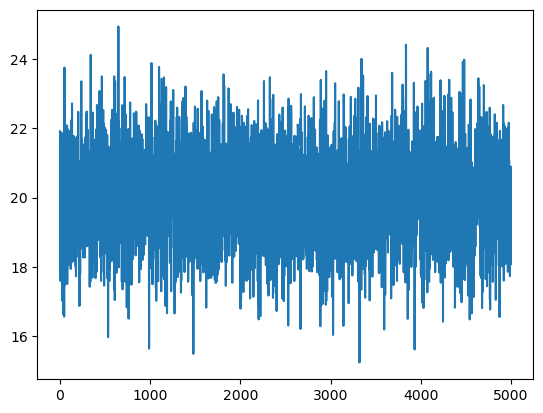

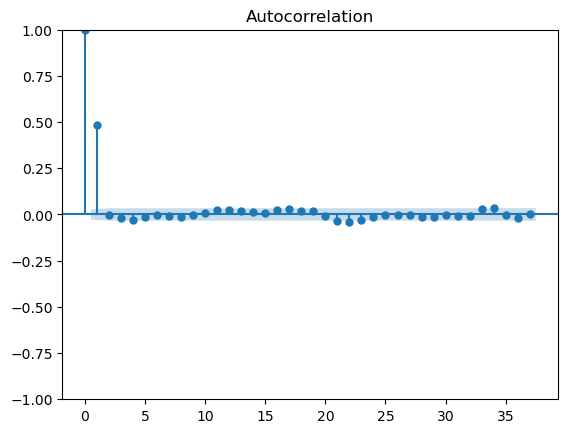

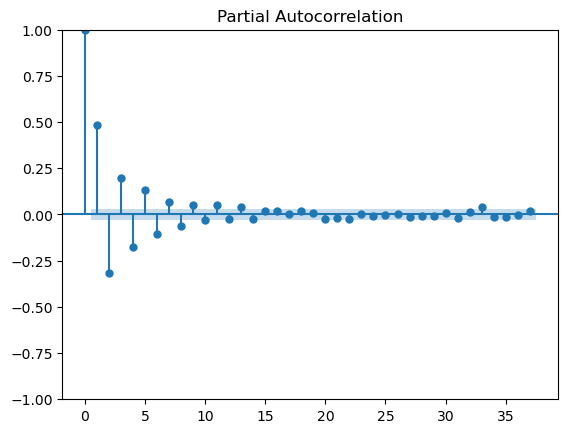

In [12]:
ma_values = moving_average(100, 5000, 20, [0.8])
plt.plot(ma_values)
plot_acf(ma_values)
plt.show()
plot_pacf(ma_values)
plt.show()

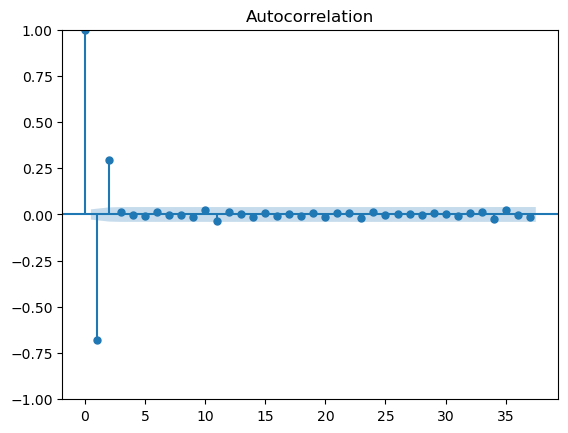

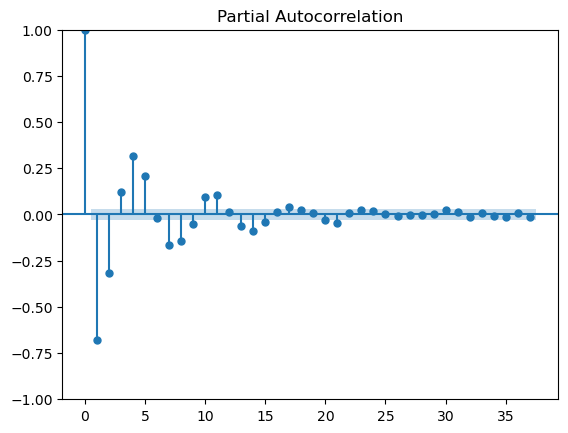

In [13]:
ma_values_2 = moving_average(100, 5000, 0, [-1, 0.8])

plot_acf(ma_values_2)
plt.show()

plot_pacf(ma_values_2)
plt.show()

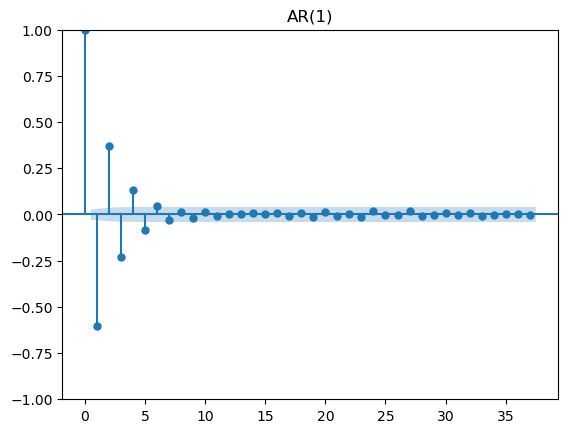

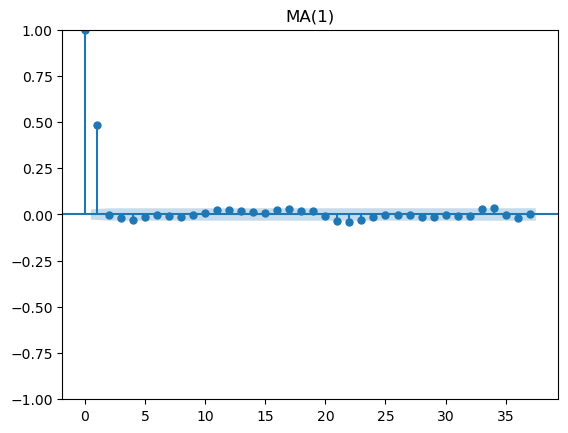

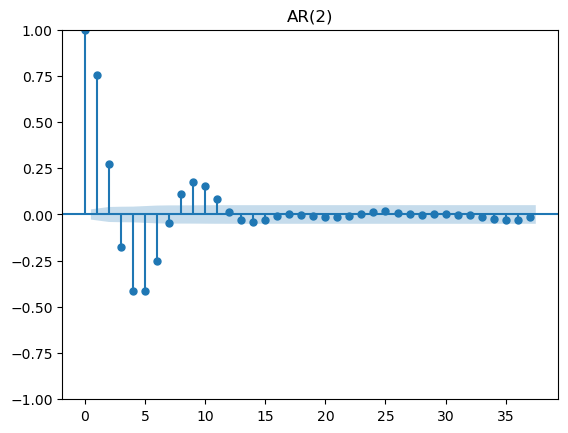

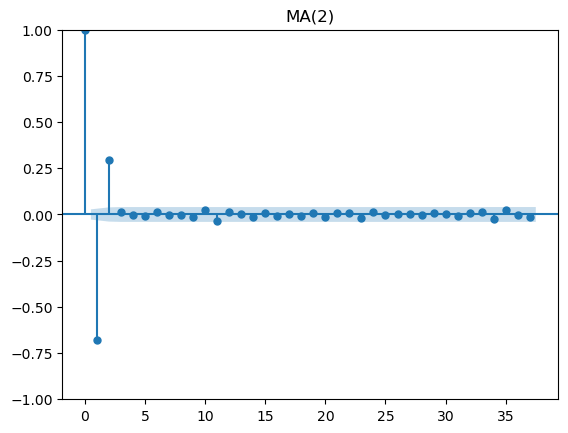

In [14]:
plot_acf(ar_model, title='AR(1)')
plot_acf(ma_values, title='MA(1)')
plot_acf(ar2_model, title='AR(2)')
plot_acf(ma_values_2, title='MA(2)')
plt.show()

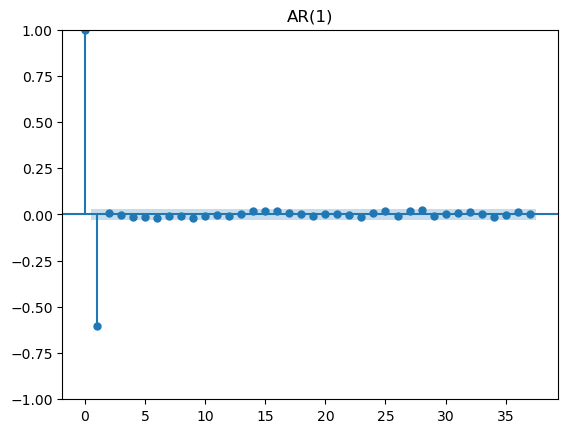

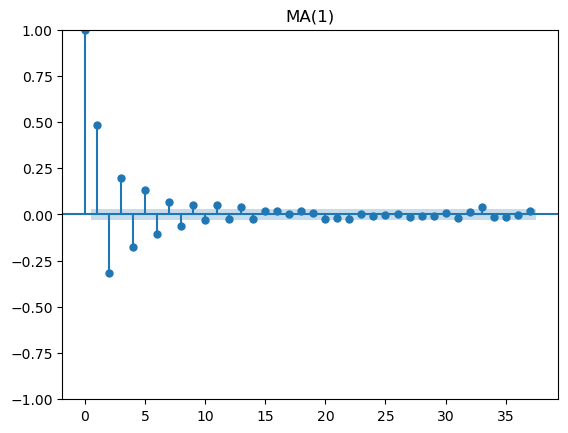

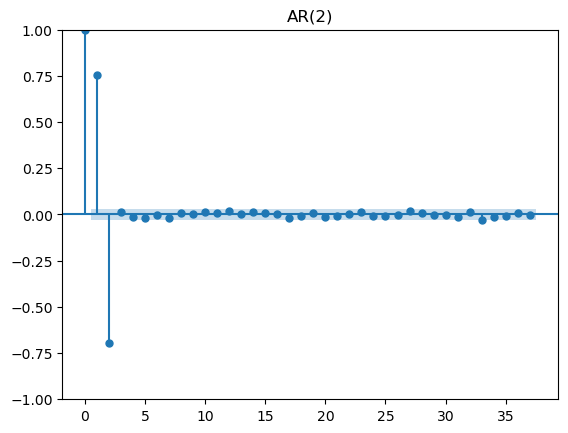

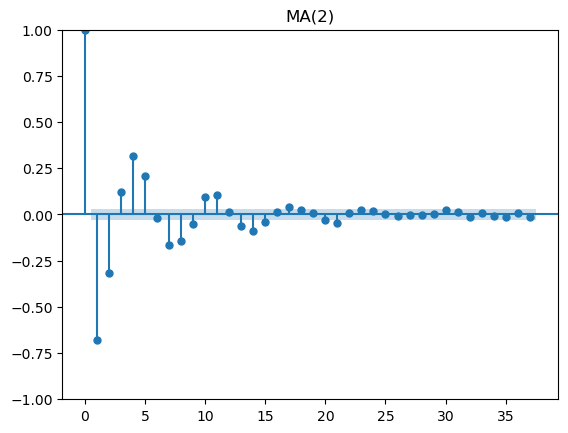

In [15]:
plot_pacf(ar_model, title='AR(1)')
plot_pacf(ma_values, title='MA(1)')
plot_pacf(ar2_model, title='AR(2)')
plot_pacf(ma_values_2, title='MA(2)')
plt.show()

In the AR and MA models, the autocorrelation and partial autocorrelation functions behave in an opposite fashion. For the AR models, the partial autocorrelation function cuts off after n+1 non-zero datapoints, where n is the degree of the model, while the autocorrelation function decays slowly with some oscillation. Opposite behaviour can be observed in the functions for the MA model,  where the autocorrelation function cuts off after n+1 non-zero datapoints, and the partial autocorrelation function decays slowly with some oscillation.